In [1]:
import tensorflow as tf 
import tensorflow_datasets as tfds 

imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [2]:
type(imdb)

dict

In [3]:
imdb

{'train': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'test': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [4]:
train_data, test_data = imdb['train'], imdb['test']

In [5]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/Users/rustamz/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0',
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=

In [6]:
tokenizer = info.features['text'].encoder # to encode

In [16]:
tokenizer

<SubwordTextEncoder vocab_size=8185>

In [7]:
print(type(tokenizer.subwords))
print(tokenizer.subwords)

, 'pee', 'nar', 'location_', 'ining_', 'gam', 'disappointing_', 'desire_', 'criminal_', 'considera', 'century_', 'celebrat', 'brow', 'area', 'Thin', 'Rec', "' (", 'ward_', 'vision_', 'treme', 'surprising_', 'super_', 'risk', 'receive', 'qual', 'pic', 'mee', 'levels', 'kins', 'jack', 'ire_', 'introduc', 'hits_', 'happening_', 'handsome', 'gradua', 'giv', 'garbage', 'forces_', 'finest_', 'easi', 'depressing', 'credits', 'asto', 'Sadly', 'Ple', 'Inc', 'Dick_', 'Alexand', 'wooden_', 'wood_', 'stro', 'steal_', 'soul_', 'reference', 'race', 'quis', 'pir', 'perv', 'obvious', 'majority_', 'lean', 'kes_', 'insti', 'identity', 'everybody_', 'double_', 'dies', 'credit', 'const', 'confe', 'compar', 'centur', 'bloody_', 'Under', 'Twi', 'Sean_', 'Lio', 'Halloween', 'Gal', 'Clu', 'Came', 'Barbara_', '?)', '11_', 'ws', 'ulous', 'subtle', 'substance', 'string', 'shocking_', 'scientist_', 'rian', 'nou', 'multi', 'lf', 'inal', 'harsh', 'handed', 'fir', 'expectations_', 'excited', 'exceptional', 'eva', 'c

In [8]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [9]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [10]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [11]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 10

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 5s 12ms/step - loss: 0.6883 - accuracy: 0.5654 - val_loss: 0.6287 - val_accuracy: 0.7566
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5747 - accuracy: 0.7775 - val_loss: 0.4411 - val_accuracy: 0.8421
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3870 - accuracy: 0.8679 - val_loss: 0.3609 - val_accuracy: 0.8628
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 0.3096 - accuracy: 0.8912 - val_loss: 0.3498 - val_accuracy: 0.8527
Epoch 5/10
391/391 [==============================] - 5s 14ms/step - loss: 0.2643 - accuracy: 0.9031 - val_loss: 0.3227 - val_accuracy: 0.8696
Epoch 6/10
391/391 [==============================] - 7s 18ms/step - loss: 0.2340 - accuracy: 0.9169 - val_loss: 0.3065 - val_accuracy: 0.8811
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2160 - accuracy: 0.9246 - val_loss: 0.3085 - val_accuracy: 0.880

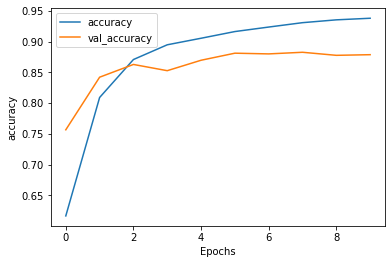

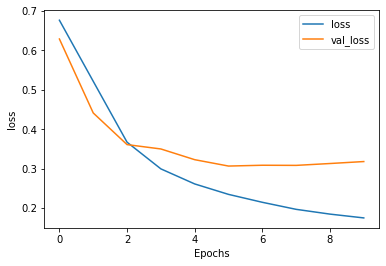

In [15]:
import matplotlib.pyplot as plt 

def draw(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

draw(history, "accuracy")
draw(history, "loss")



